In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

%matplotlib inline

Using TensorFlow backend.


# 2.1 Load and Explore the MNIST Data

In [2]:
# load train and test data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# some information about the data we just got from keras
print(type(train_images))
print(train_images.shape)

print(type(train_labels))
print(train_labels.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)


7


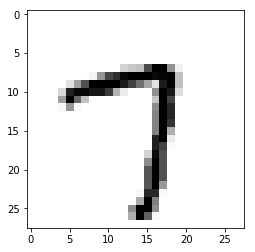

In [4]:
# lets look at a random image
img_no = 4242
img = train_images[img_no,:,:]
plt.imshow(img, cmap=plt.cm.gray_r)
print(train_labels[img_no])

# 2.1 Buid a keras Network

In [5]:
# define network architecture
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [6]:
# compile the keras (tensorflow) flow graph
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [7]:
# prepare image data and labels
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255  # we convert the initial int pixel values to float from 0 to 1

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

# prepare labels, this is an example of a one-shot encoding
# result is a M X 10 shaped array with 1 in desired category and 0 elsewhere
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [8]:
# train the network
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s - loss: 0.2543 - acc: 0.9266     
Epoch 2/5
60000/60000 [==============================] - 4s - loss: 0.1036 - acc: 0.9685     
Epoch 3/5
60000/60000 [==============================] - 4s - loss: 0.0681 - acc: 0.9800     
Epoch 4/5
60000/60000 [==============================] - 4s - loss: 0.0491 - acc: 0.9852     
Epoch 5/5
60000/60000 [==============================] - 4s - loss: 0.0365 - acc: 0.9890     


In [9]:
# check trined network so far on the test data
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('')
print('test_acc:', test_acc)

 9088/10000 [==========================>...] - ETA: 0s
test_acc: 0.9788


The difference between the training accuracy and the test accuracy, while not that large here, still 
is an indication of overfitting.  Overfitting occurs when the model learns too much about some incidental
details of the data it is training with which isn't always present in other data it doesn't train with.

Overfitting is not too big of an issue here with our simple 2 layer neural network, but is a very significant
problem for many machine learning data sets and applications.

# 2.2 Data Representations for Neural Networks

Tensors are containers for numbers.  Tensors are another name for a multi dimensional (ndimensional) array,
so don't get too impressed or spooked by the name.  A matrix of 2 dimensions is a 2D tensor.  The concept of a
tensor is a generalization of matrices to an arbitrary number of dimensions.

## 2.2.1 Scalars 0D Tensor (Rank 0 Tensor)
A single number can be called a scalar or a 0D tensor.  It has no dimensions (or axis)

In [10]:
x = np.array(12)
print(x)
print(x.ndim)
print(x.shape)

12
0
()


# 2.2.2 Vectors or 1D Tensor (Rank 1 Tensor)
A 1 dimensional tensor is also known as a vector.

This is actually a 4-dimensional vector (**Note**: textbook incorrectly identifies this as 5-dimensional).
Dimension is used both to denote number of axis.  A 4-dimension
vector can be thought of as a point in 4 dimensional space.  It is confusing to call a tensor with 4 different
axis as 4D, I prefer to call it a rank 4 tensor if it has 4 separate axis, but the notation 4D tensor is common
so you should understand they are related but mean different things.

In [11]:
x = np.array([12, 3, 6, 14])
print(x)
print(x.ndim)
print(x.shape)

[12  3  6 14]
1
(4,)


## 2.2.3 Matrices or 2D Tensors (Rank 2 Tensor)

You may be most familiar with matrices, which are 2D or Rank 2 tensors.  A matrix has 2 axis, each of some
number of dimensions.  Matrices are important for linear algebra, and many other scientific computing purposes.
Square matrices, with equal numbers of rows and columns, are often special cases used for many purposes.
But a matrix can have any number of rows and columns.

The entries from the first axis are called *rows* (3 in this case) and the entries from the second
axis are called *columns* (5 in this case).

In [12]:
# a 3X5 matrix.  This matrix has 3 rows (3 dimensions) by 5 columns (5 dimensions).  Since the matrix
# has 2 axis, it is a 2D tensor, or a Rank 2 tensor
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
print(x)
print(x.ndim)
print(x.shape)

[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]
2
(3, 5)


# 2.2.4 3D (Rank 3) Tensors and higher-dimensional Tensors

If you pack Matrices (Rank 2 Tensors) into a cube, you get a 3D Tensor (or a Rank 3 Tensor).
We can still visualize such a Tensor as a cube of numbers with rows, columns, and depth or width.

In [13]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])

print(x)
print(x.ndim)
print(x.shape)

[[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]]
3
(3, 3, 5)


By packing multiple rank 3 tensors into an array, you can create a rank 4 (4D) tensor, and so on.
In deep learning, you'll generally manipulate tensors that are 0D to 4D, although you may go up to 5D if you
process video data.

# 2.2.5 Key Attributes

A tensor is defined by 3 key attributes.  A NumPy ndimensional array manages and keeps track of these
attributes, and the define the tensor/ndimensional array:

- Number of axes (rank)
- Shape: a *tuple* which describes the number of dimensions along each axes (or rank)
- Data type: The type of values in the tensor (float, int, etc.)

For example, going back to the train_images tensor (which is a NumPy ndarray).  We can
determine each of these attributes of the tensor:

In [14]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Number of axes (or the Tensor rank)
print(train_images.ndim)

# Tensor shape (number of dimensions for each rank or axes)
print(train_images.shape)

# Data type, the images are initially represented as 8 bit integers
print(train_images.dtype)

3
(60000, 28, 28)
uint8


label:  9


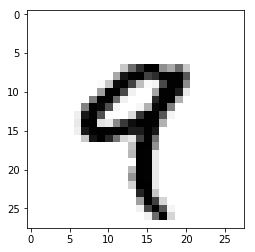

In [15]:
# we already showed an example of displaying one of training images, here
# is another example
image_no = 4
digit = train_images[image_no]
plt.imshow(digit, cmap=plt.cm.binary)
print('label: ', train_labels[image_no])

# 2.2.6 Manipulating Tensors using NumPy

**Tensor slicing**: Python and NumPy are high-level scripting languages.  They make it easy to specify
subsets or groups of tensor dimensions as needed.

For example, lets get the trainining images #10 to #100 (#100 isn't included) and put them into an array of
shape (90, 28, 28):

In [16]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [17]:
# this is equivalent to more detailed notation, where : is equivalent to selecting the entire axis
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

# also equivalent, explicitly specify the axis 1 and 2 begin and end indexes
my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)
(90, 28, 28)


In [18]:
# we looked at slicing in previous lecture notebooks.
# For example, if we need the bottom right corner of all images
my_slice = train_images[:, 14:, 14:]
print(my_slice.shape)

(60000, 14, 14)


In [19]:
# or even more high-level, if we need to crop the center 14x14 pixels. 
# this kind of slicing for convolutional layer operations, make sure you understand what is going on here
my_slice = train_images[:, 7:-7, 7:-7]
print(my_slice.shape)

(60000, 14, 14)


# 2.2.7 The Notion of Data Batches

In general, by convention, the first axis (axis 0), is the sample axis.  For example, for our train
and test images in the MNIST data, the first axis selects a single 28x28 sized images.

If we want to create a training batch of the first 128 images, we can slace only along the
first axis (axis 0).  

If we need the next 128 images, we can slice as shown.  

And in general if we need the nth batch, we can slice as shown.

In [20]:
# the 0th batch (where batch size = 128)
batch = train_images[:128]
print(batch.shape)

(128, 28, 28)


In [21]:
# the next batch
batch = train_images[128:256]
print(batch.shape)

(128, 28, 28)


In [22]:
# Let's generalize.  Use variables to hold parameters
n = 5 # we want the nth batch number
batch_size = 128 # size of batch

# slice the nth batch from tensor 
print(batch_size * n)
print(batch_size * (n+1))
batch = train_images[batch_size * n : batch_size * (n + 1)] # so for n=5 we slice image numbers 640 to 768
print(batch.shape)


640
768
(128, 28, 28)


# 2.3 The Gears of Neural Networks: Tensor Operations

The flow of tensors in a "tensor flow" network is similar to the flow of bits in an electornic circuit/network
of a computer.  The binary operations of a binary circuit in this analogy (AND, OR, NOR) are similar to 
how tensors flow in a tensor flow network.  But the operations in a tensor flow network are operations
on tensors, so things like add, multiple, find the derivative, etc.

A keras layer corresponds to a layer in a tensor flow network.  A keras layer can be interpreted as a
function which takes a tensor as input and returns another tensor as output.

So as shown in this part of the text, the 512 unit dense layer defined previously basically defines
3 tensor operations, a matrix mutiplication of the input and weight, then an addition, then a 
rectified linear unit (relu) transformation of the result.  But in short the layer simply defines
a set of tensor (matrix) operations to transform an input tensor to an output tensor.

# 2.3.1 Element-Wise Operations

It is important to understand the examples in this part of the text.  They should help drive in what we mean
by performing vectorized operations, and how to think in a more tensor oriented way of writing programs.

relu stands for rectified linear unit.  This is a type of activation or squashing function (we will talk more about
these later.  At this point in the text, the book mostly passes over what the relu squashing function does.
Basically a relu operation is defined as (Challot doesn't use mathematical notation in this chapter, which is
fine, so I may show the equivalent mathematical expressions from time to time for some of these operations):

$$
relu(x) = \begin{cases}
0, & \text{if } x \le 0 \\
x  & \text{otherwise}
\end{cases}
$$

So the squashing function is quite simple.  We return 0 for negative values, and return the value unchanged for
positive values.  As shown, we can write a naive, unvectorized version using an explicit loop:

In [23]:
def naive_relu(x):
    """Naive implementation of relu objective function.  Perform relu squashing
    function on the provided 2D NumPy tensor parameter x.
    """
    assert len(x.shape) == 2 # only allow 2D Numpy tensors, we could generalize to any number of dimensions, but more work
    
    x = x.copy() # make a copy, so we don't change the original tensor we are given.
    for row in range(x.shape[0]): # outer loop iterates over each row of the 2D tensor
        for col in range(x.shape[1]): # inner loop iterates over each column of the 2D tensor
            # so x[row,col] accesses 1 particular value in the 2D tensor
            x[row, col] = max(x[row, col], 0.0) # use the max function, if value is > 0, we use it, otherwise we change to 0
    
    return x # return the resulting copy after relu() squashing

x = np.random.normal(size=(10, 3)) # create a 2D tensor of random normal values with 10 rows and 3 columns
print(x)
print(naive_relu(x))

[[-0.18852377 -1.18886383 -0.54732152]
 [ 0.66275095  0.7129943   0.95453144]
 [-0.71849316 -0.62924596  0.13359467]
 [ 0.6732678   1.56410233 -0.59655056]
 [ 0.25299837  0.36603523  1.85319125]
 [-0.03649053  0.346729   -0.94560686]
 [-1.60084286  0.4393036  -1.42033587]
 [-0.53630976 -1.77731647  1.25040569]
 [-1.81240838 -0.22169166  1.21992716]
 [-0.27251781 -1.66491067  1.5292328 ]]
[[ 0.          0.          0.        ]
 [ 0.66275095  0.7129943   0.95453144]
 [ 0.          0.          0.13359467]
 [ 0.6732678   1.56410233  0.        ]
 [ 0.25299837  0.36603523  1.85319125]
 [ 0.          0.346729    0.        ]
 [ 0.          0.4393036   0.        ]
 [ 0.          0.          1.25040569]
 [ 0.          0.          1.21992716]
 [ 0.          0.          1.5292328 ]]


As shown in the textbook, we can replace all of the explicit loops with a single NumPy vectorized operation

In [ ]:
def vectorized_relu(x):
    """Use NumPy array operations to perform relu objective function.  This function
    also improves the original as it will work for a tensor of any shape, not only just for 2D
    tensors.
    """
    return np.maximum(x, 0.0)

print(x)
print(vectorized_relu(x))

[[-0.18852377 -1.18886383 -0.54732152]
 [ 0.66275095  0.7129943   0.95453144]
 [-0.71849316 -0.62924596  0.13359467]
 [ 0.6732678   1.56410233 -0.59655056]
 [ 0.25299837  0.36603523  1.85319125]
 [-0.03649053  0.346729   -0.94560686]
 [-1.60084286  0.4393036  -1.42033587]
 [-0.53630976 -1.77731647  1.25040569]
 [-1.81240838 -0.22169166  1.21992716]
 [-0.27251781 -1.66491067  1.5292328 ]]
[[ 0.          0.          0.        ]
 [ 0.66275095  0.7129943   0.95453144]
 [ 0.          0.          0.13359467]
 [ 0.6732678   1.56410233  0.        ]
 [ 0.25299837  0.36603523  1.85319125]
 [ 0.          0.346729    0.        ]
 [ 0.          0.4393036   0.        ]
 [ 0.          0.          1.25040569]
 [ 0.          0.          1.21992716]
 [ 0.          0.          1.5292328 ]]


The textbook probably makes this point later, but vectorized operations are almost always significantly faster
than a naive explicit loop implementation.  For example, for comparison

In [ ]:
%timeit naive_relu(x)
%timeit vectorized_relu(x)

10000 loops, best of 3: 26.4 µs per loop


It is normal to get a 15 to 30 times speedup here.

Performing an element wise add of tensors gives a similar idea and result

In [ ]:
def naive_add(x, y):
    """Perform element wise addition of 2 2D tensors named x and y.
    Tensors must have 2 dimensions and be of the same shape
    """
    assert len(x.shape) == 2 # we only implement for 2D tensors
    assert x.shape == y.shape # we are not implementing broadcasting, tensors must be of exactly the same shape and size
    
    x = x.copy() # make a copy to return result in and not modifiy original arrays that are passed in
    
    for row in range(x.shape[0]):
        for col in range(x.shape[1]):
            x[row, col] += y[row, col] # add y to the copy of value in x, result is sum of the element at [row, col]
            
    return x

y = np.random.normal(size=x.shape)
%timeit naive_add(x, y)

def vectorized_add(x, y):
    """Perform element wise addition of 2 tensors named x and y using
    vectorized NumPy operations.  Again this function is more general than naive_add as it can handle
    any 2 vectors, as long as they have the same shape (no broadcasting yet).
    """
    assert x.shape == y.shape
    
    return x + y

%timeit vectorized_add(x, y)

# 2.3.2 Broadcasting

Broadcasting is a very useful, high-level concept for vectorized array operations, and extensive use of it is made
in high-level Python machine learning code.  The most straight forward rule of thumb to remember is that in general
with broadcasting, you can apply two-tensor element-wise operations if one tensor has shape 
$(a, b, \ldots, n, n+1, \ldots, m)$ and the other has a shape $(n, n+1, \ldots, m)$.  i.e. it has 1 or fewer
dimensions, and the dimensions match the last dimensions of the tensor being broadcast into.

So as shown, if we want to perform element-wise addition of a vector and a 2D matrix tensors, we can broadcast
the vector to each row of the 2D tensor if the vector has the same number of elements as the number of columns
in the 2D matrix.

In [ ]:
def naive_add_matrix_and_vector(x, y):
    """Demonstrate broadcasting by implementing a naive explicit version by hand.  
    This function only works on x a 2D tensor/matrix, and y a 1D vector when y
    has the same number of elements as columns in x
    """
    assert len(x.shape) == 2 # x must be a 2D matrix tensor
    assert len(y.shape) == 1 # likewise we only work with 1D tensor vectors for y
    assert x.shape[1] == y.shape[0] # to properly broadcast, the number of elements of y must match number of columns in x
    
    x = x.copy() # make a copy to return result of broadcast addition, so we don't change original matrices
    for row in range(x.shape[0]):
        for col in range(x.shape[1]):
            x[row, col] += y[col] # add each element in y to the corresponding col element of x
            
    return x

x = np.random.normal(size=(10,3))
y = np.random.normal(size=(3,))
print(x)
print(y)

print(naive_add_matrix_and_vector(x, y))

As discussed in the text, numpy vectorized operations and numpy library array functions will broadcast results if
shapes properly align.


In [ ]:
print(x + y)

print(np.maximum(x, y)) # maximum of each value with corresponding item in y

# 2.3.3 Tensor dot

The tensor dot product is the most common, most useful tensor operation.  In linear algebra this is known as matrix
multiplication.  You should make sure you understand conceptually what a dot product does.  Figure 2.5 is a good
intuitive visual representation of the tensor dot-product operation.  But tensor dot products can be performed
on any 2 arrays where the size of the last dimension of x matches the size of the last dimension of y.

For example:

In [ ]:
a,b,c,d, e = 3, 5, 8, 6, 12

x = np.random.normal(size=(a,b,c,d))
y = np.random.normal(size=(d,))
print(x.shape)
print(y.shape)
z = np.dot(x, y)
print(z.shape)

y = np.random.normal(size=(d, e))
z = np.dot(x, y)
print(z.shape)

# 2.3.4 Tensor Reshaping

Tensors can be arbitrarily reshaped, as long as the number of elements remain the same.  This can even be done
when you are changing the number of dimensions, again as long as the total number of elements is constant.
For example, we can (re)shape 12 elements in many different ways:

In [ ]:
x = np.random.normal(size=(12,))
print(x)
print(x.reshape((6, 2))) # notice you have to pass in a tuple for many NumPy function when specifying shape of the Tensor
print(x.reshape((3, 2, 2)))
print(x.reshape((4, 3)))

# 2.3.5 Geometric Interpretation of Tensor Operations

The field of linear algebra is based on geometric interpretations of matrix operations.  As shown in this section
addition of a vector can be interpreted geometrically as the sum of the vectors.  Likewise, 
operations like rotation, scaling, affine transformations, etc. can all be accomplised by applying
particular matrix operations.  It is useful, but not necessary, to understand these geometric interpretations
of tensor operations.

# 2.3.6 A Geometric Interpretation of Deep Learning

For example, the layers of a deep neural network are simply applying a sequence of matrix/tensor transformations of
some input to an output.  So in some sense, in some high-dimensional space, the result of the (learned) transformations is to translate, rotate, stretch, etc. an input to a more useful form that can be more easily (linearly) separted
into classes or categories (when doing classification type problems).

# 2.4 The Engine of Neural Networks: Gradient-Based Optimization

Many layers of a neural network are performing 3 basic transformation to get from an input tensor and produce
an output tensor.

$$
output = relu( dot(W, input) + b)
$$

$input, output, W$ and $b$ are all tensors.  $W$ and $b$ are a set of weights and biases respectively.  These
are the parameters of the layer that need to be learned.  And then input are provided either as the initial 
input data being trained with, or as an input tensor from a previous layer. 

The typical layer perform 3 tensor operations.  We take the tensor dot product of the inputs times the current
$W$ weight parameters.  To this resulting tensor we add the $b$ bias parameters.  And we then squash the
resulting tensor through an activation function, like the $relu()$ function we have already seen.

The trick is that $W$ and $b$ need to be learned.  These are the *trainable parameters* of the layer.  Initially
these are set to random values, but through training we want to find a set of weights and parameters that will
give a correct output for each given input.

In order to learn the correct values for the trainable parameters we have to perform training.  The training
loop works roughly in the 4 steps as shown, take a batch of training samples, provide these as inputs and get the
outputs the network is currently producing (the forward pass), compute the loss which is a measure of the measure 
between the predicted values and the correct labels, then update all the weights and bias trainable parameters 
based on this loss in such a way that slightly reduces the loss.

If you can do these steps repeatedly, loss will eventually be reduced, and when you achieve very low loss there
will be a low mismatch between the prediction values your network is producing and the expected target labels.

In short, in order to compute loss we need to be able to determine derivaties of our loss functions, and to reduce
loss, we need to be able to make small changes in weights and biases that cause the loss function to move
down the defined gradients.

# 2.4.1 What's a Derivative

I will be assuming that you have run across the concept of derivaties in previous classes.  The important idea
is that, if we have defined a smooth loss function, then making a small change in one direction or another for
a particular weight will either increase or decrease the loss.  If we can derive the derivative of our function,
we will know the slope of the function at a particular point, and thus know which direction we need to change our
trainable weight or bias parameters in order to move down the slope and minimize the loss function.

# 2.4.2 Derivative of a Tensor Operation: The Gradient

A *gradient* is the derivative of a tensor operation.  It is a generalization of the concept of the derivative to
functions of multidimensional inputs.

Given the loss function, the gradients at a particular point can be calculated analytically, and as discussed in
this section, if you can calculate the gradient then you can step in the opposite direction along each gradient
dimension by a small step, and will be guaranteed to reduce the loss function (for the current batch of values).

# 2.4.3 Stochastic Gradient Descent

Given a differentiable (loss) function, it is theoretically possible to find its minimum analytically.  But solving
this analytically, while it can be done for 2D or 3D tensors, becomes intractable real quickly, and will be
hopelessly slow for networks with thousands of trainable parameters (modern deep networks can have tens of thousands
or often several tens of millions of trainable parameters).

Instead we can use the 4 steps we outlined before, calculate gradients and modify the parameters by a little
based on the current loss value on a random batch.  This is the basis of stochastic gradient descent (SGD).
SGD is a iterative rather than analytic method for finding the minimum loss by iteratively following gradients
of the loss function.  The algorithm is *stochastic* because each batch of data is drawn at random from all of the
training input samples.

This description is simplified in several respects.  Performing SGD in a high dimensional space means that
you need to be careful when updating trainable parameters.  The optimization methods or *optimizers* often use
more than the simple gradient, using concepts like momentum to help speed up convergence, avoid local
minima and avoid making too large of an update.

# 2.4.4 Chaining Derivatives: The Backpropagation Algorithm

One problem we have skipped over is that the trainable parameters in a neural network are not all in one layer,
but in a multi-layer network we chain together many such layers of weight and bias parameters.  We can not
necessarily calculate gradients for an intermediate layers, because we only have the target or correct values
for the final output layer from which to calculate the loss.  However, it is possible to chain the calculation
of the loss to previous layers, using what is known as the backpropagation technique.  

One of the strengths of *symbolic differentiation* frameworks like TensorFlow or Theano is that they can
calculate the gradients and backpropagate them symbolically.  Thanks to symbolic differentation we don't have
to implement this complex backpropagation of gradients through our network by hand.

# 2.5 Looking Back at our First Example